# Source localization and functional connectivity analysis on HCP MEG rest data

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#About" data-toc-modified-id="About-1">About</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Compute-source-activity-and-FC" data-toc-modified-id="Compute-source-activity-and-FC-3">Compute source activity and FC</a></span></li><li><span><a href="#Visualize-results" data-toc-modified-id="Visualize-results-4">Visualize results</a></span></li><li><span><a href="#More..." data-toc-modified-id="More...-5">More...</a></span></li></ul></div>

## About

This notebook loads the functions in `mne_src_fc_rest.py`, which are modified and extended from the `mne-hcp` scripts and functions. 

The main focus here is amplitude-envelope correlation (aec) matrices. 

Whilst these look pretty nice in many subjects, with features like prominent two-block (i.e. intrahemispheric) structure, and and strong secondary diagonals (i.e. strong connections between contralateral homologoues), they do seem very noisy and homogenous in others. 

Is this just 'how' the data is, or the result of suboptimal source reconstruction parameters in those subjects?


## Setup

In [1]:

# Generic stuff
import os,sys,glob,numpy as np,pandas as pd


# Analysis functions from custom script

from mne_src_fc_rest import compute_src_label_ts,fc_mnespectral,fc_aec


# Vizualization stuff

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import clear_output



In [17]:
meg_subs = np.loadtxt('S95_MEG.txt').astype(int)

# Freq band definitions for FC

freq_bands = dict(delta=(2, 4), theta=(5, 7), alpha=(8, 12), 
                  beta=(15, 29), gamma=(30, 45))


# Node reordering for connectivity matrix visualizations

nidx = np.array([46, 32, 50, 58, 16,  6, 22, 42, 26, 20, 12, 34, 16,  8, 64, 18, 60,
                 66, 30,  0, 62, 44, 48,  4, 56,  2, 54, 36, 40, 38, 24, 28, 52, 10,
                 47, 33, 51, 59, 15,  7, 23, 43, 27, 21, 13, 35, 17,  9, 65, 19, 61,
                 67, 31,  1, 63, 45, 49,  5, 57,  3, 55, 37, 41, 39, 25, 29, 53, 11])


## Compute source activity and FC

In [3]:
subject = '105923'
bads = ['A147']

In [4]:
%%time
src_label_ts,sfreq = compute_src_label_ts(subject,bads=bads)
clear_output()

CPU times: user 5min 1s, sys: 5min 59s, total: 11min
Wall time: 3min 18s


In [5]:
%%time

fc_sps = fc_mnespectral(src_label_ts,sfreq,freq_bands)

fc_aecs = [fc_aec(t,sfreq,freq_bands) for t in src_label_ts]
fc_aecs_avg = {freq: np.mean(np.array([a[freq] for a in fc_aecs]),axis=0)
                        for freq in freq_bands.keys()}

clear_output()

CPU times: user 22.6 s, sys: 2.38 s, total: 25 s
Wall time: 24.7 s


## Visualize results

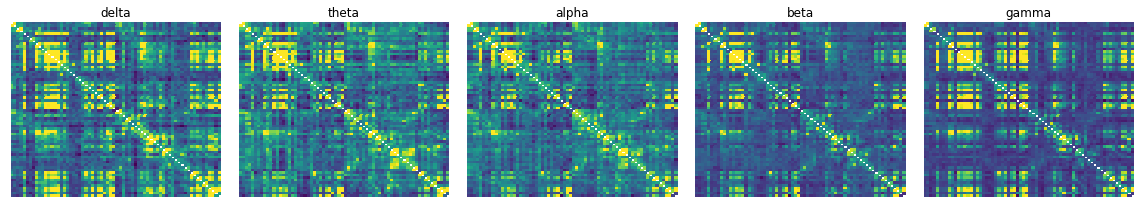

In [7]:
fig, ax = plt.subplots(ncols=5, figsize=(16,3))

for f_it,f in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
    a = ax[f_it]
    sns.heatmap(fc_aecs_avg[f][nidx,:][:,nidx],
            cmap='viridis',mask=np.eye(68),vmax=0.4,ax=a,
            xticklabels='',yticklabels='',cbar=False)
    a.set_title(f)
    
plt.tight_layout()

## More...

CPU times: user 5min 16s, sys: 6min 4s, total: 11min 20s
Wall time: 3min 59s


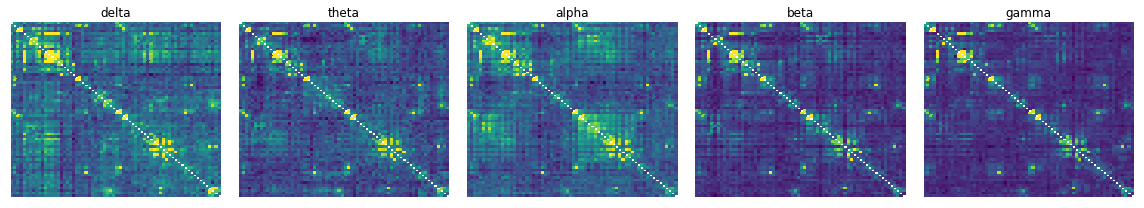

In [8]:
%%time

subject = '898176'
bads = ['A147']

src_label_ts,sfreq = compute_src_label_ts(subject,bads=bads)

fc_sps = fc_mnespectral(src_label_ts,sfreq,freq_bands)

fc_aecs = [fc_aec(t,sfreq,freq_bands) for t in src_label_ts]
fc_aecs_avg = {freq: np.mean(np.array([a[freq] for a in fc_aecs]),axis=0)
                        for freq in freq_bands.keys()}

clear_output()

fig, ax = plt.subplots(ncols=5, figsize=(16,3))

for f_it,f in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
    a = ax[f_it]
    sns.heatmap(fc_aecs_avg[f][nidx,:][:,nidx],
            cmap='viridis',mask=np.eye(68),vmax=0.4,ax=a,
            xticklabels='',yticklabels='',cbar=False)
    a.set_title(f)
    
plt.tight_layout()

CPU times: user 5min 16s, sys: 7min 28s, total: 12min 45s
Wall time: 4min 24s


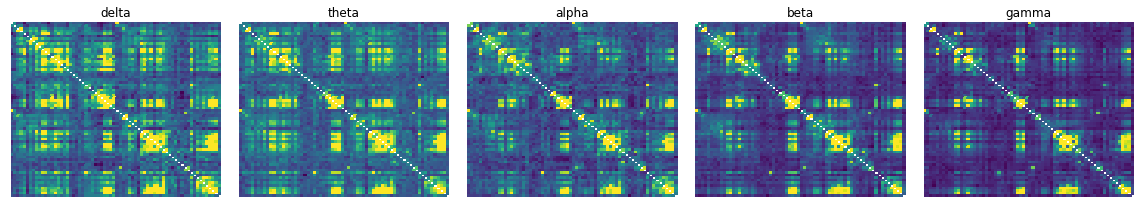

In [9]:
%%time

subject = '680957'
bads = [] 

src_label_ts,sfreq = compute_src_label_ts(subject,bads=bads)

fc_sps = fc_mnespectral(src_label_ts,sfreq,freq_bands)

fc_aecs = [fc_aec(t,sfreq,freq_bands) for t in src_label_ts]
fc_aecs_avg = {freq: np.mean(np.array([a[freq] for a in fc_aecs]),axis=0)
                        for freq in freq_bands.keys()}

clear_output()

fig, ax = plt.subplots(ncols=5, figsize=(16,3))

for f_it,f in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
    a = ax[f_it]
    sns.heatmap(fc_aecs_avg[f][nidx,:][:,nidx],
            cmap='viridis',mask=np.eye(68),vmax=0.4,ax=a,
            xticklabels='',yticklabels='',cbar=False)
    a.set_title(f)
    
plt.tight_layout()

CPU times: user 5min 18s, sys: 6min 56s, total: 12min 14s
Wall time: 4min 32s


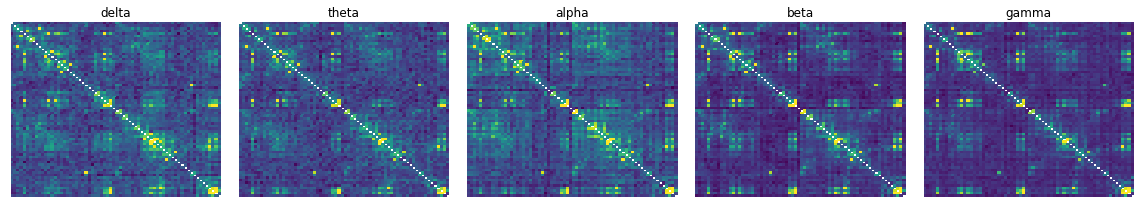

In [10]:
%%time

subject = '715950'
bads = [] 

src_label_ts,sfreq = compute_src_label_ts(subject,bads=bads)

fc_sps = fc_mnespectral(src_label_ts,sfreq,freq_bands)

fc_aecs = [fc_aec(t,sfreq,freq_bands) for t in src_label_ts]
fc_aecs_avg = {freq: np.mean(np.array([a[freq] for a in fc_aecs]),axis=0)
                        for freq in freq_bands.keys()}

clear_output()

fig, ax = plt.subplots(ncols=5, figsize=(16,3))

for f_it,f in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
    a = ax[f_it]
    sns.heatmap(fc_aecs_avg[f][nidx,:][:,nidx],
            cmap='viridis',mask=np.eye(68),vmax=0.4,ax=a,
            xticklabels='',yticklabels='',cbar=False)
    a.set_title(f)
    
plt.tight_layout()

In [19]:
subs2do = ['433839','599671', '406836','662551','680957','715950','891667',
           '898176','877168','825048','660951','601127','599671','109123','200109','406836']


In [ ]:
all_fc_aecs_avg = {}

for subject in subs2do:
    
    src_label_ts,sfreq = compute_src_label_ts(subject,bads=bads)

    fc_sps = fc_mnespectral(src_label_ts,sfreq,freq_bands)

    fc_aecs = [fc_aec(t,sfreq,freq_bands) for t in src_label_ts]
    fc_aecs_avg = {freq: np.mean(np.array([a[freq] for a in fc_aecs]),axis=0)
                        for freq in freq_bands.keys()}


    all_fc_aecs_avg[subject] = fc_aecs_avg
    
    clear_output()
    

In [21]:
len(all_fc_aecs_avg)

13

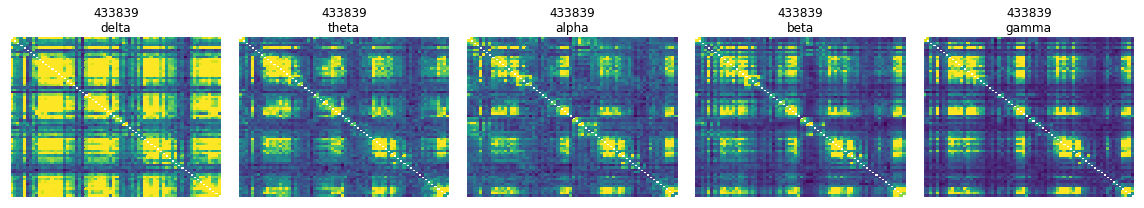

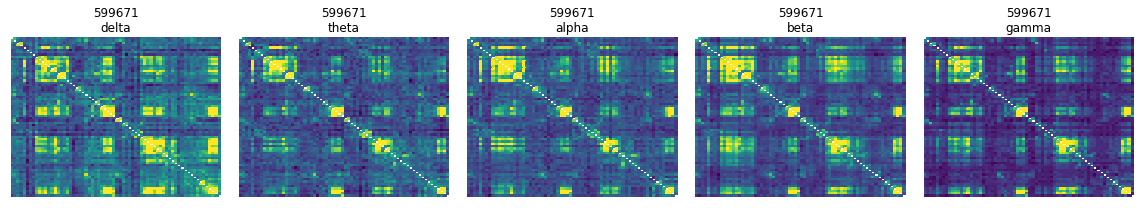

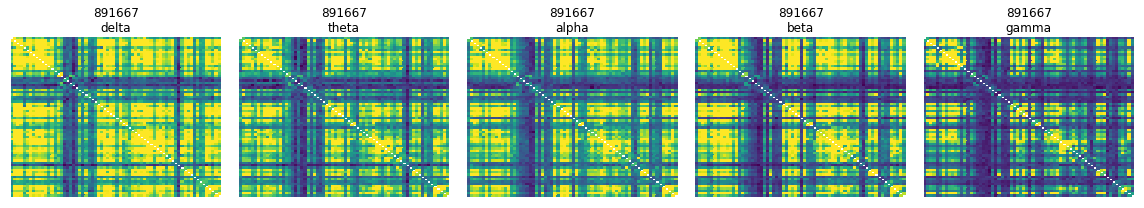

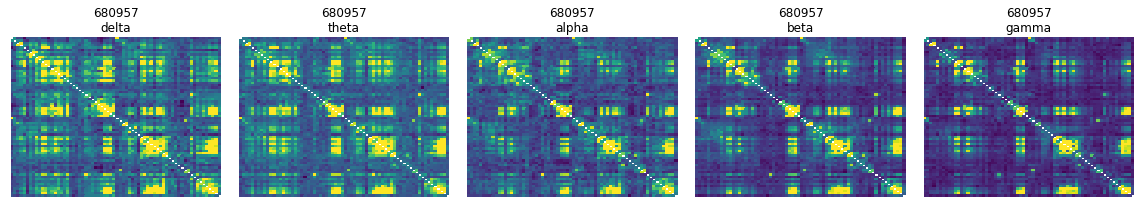

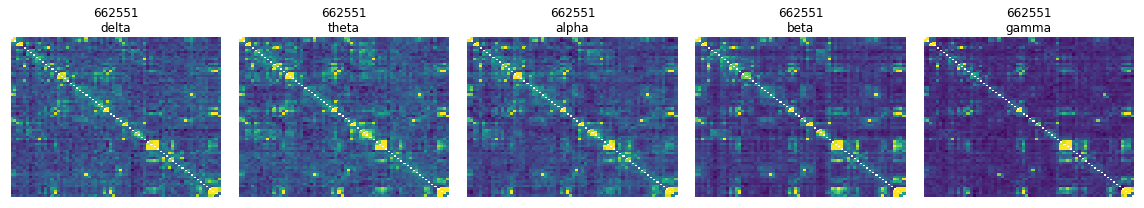

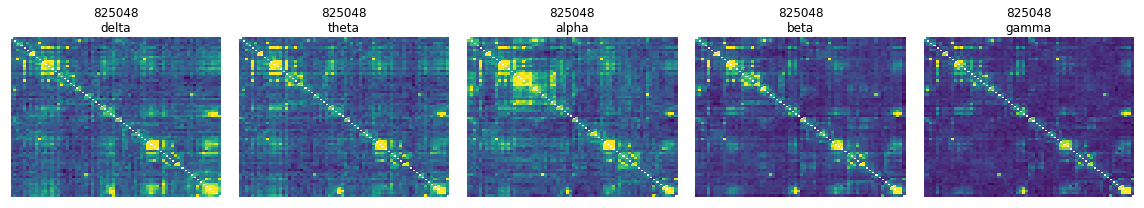

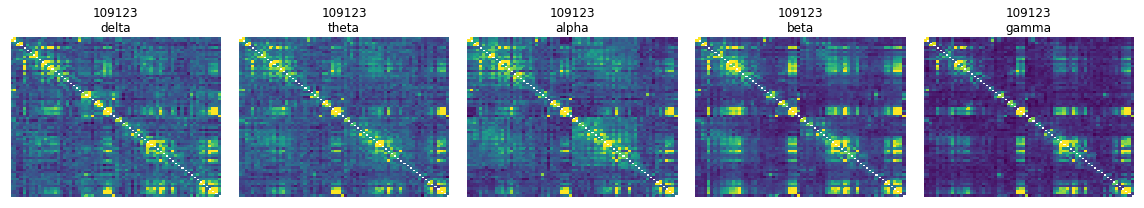

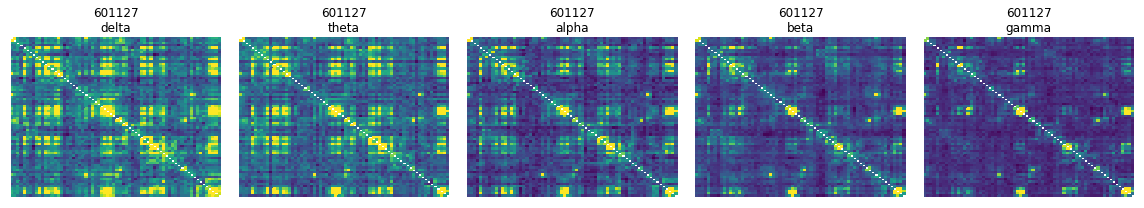

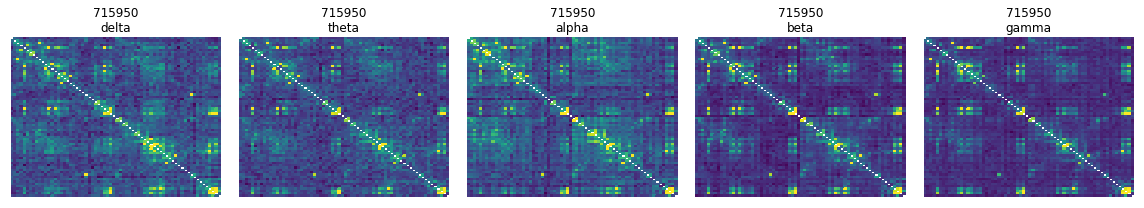

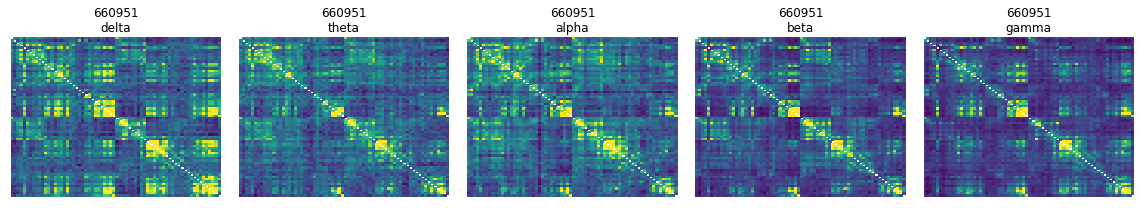

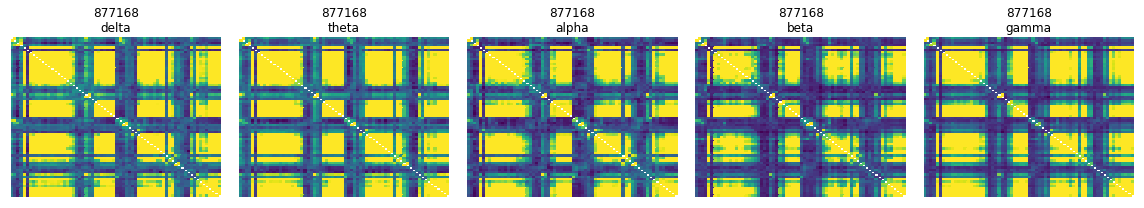

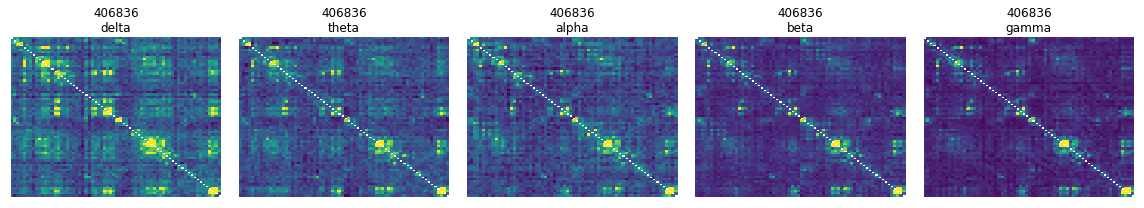

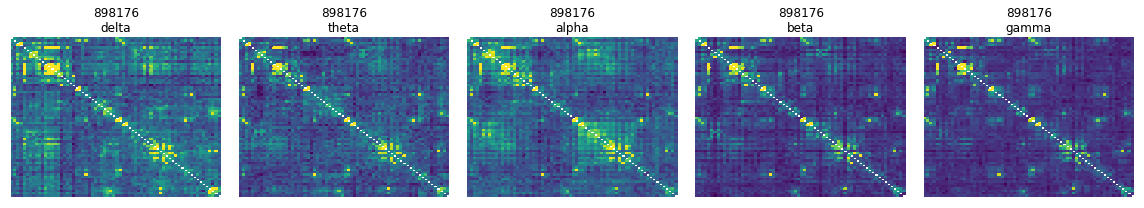

In [24]:
for subject in all_fc_aecs_avg.keys():
    
    
    fig, ax = plt.subplots(ncols=5, figsize=(16,3))

    for f_it,f in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
        a = ax[f_it]
        sns.heatmap(all_fc_aecs_avg[subject][f][nidx,:][:,nidx],
            cmap='viridis',mask=np.eye(68),vmax=0.4,ax=a,
            xticklabels='',yticklabels='',cbar=False)
        a.set_title('%s\n%s' %(subject,f))
    
    plt.tight_layout()    
    

Same, with automatic scaling:

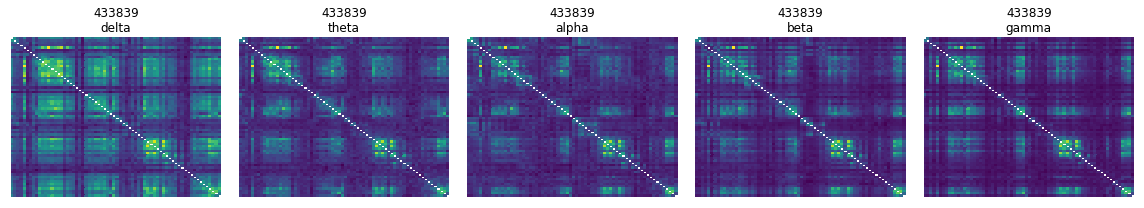

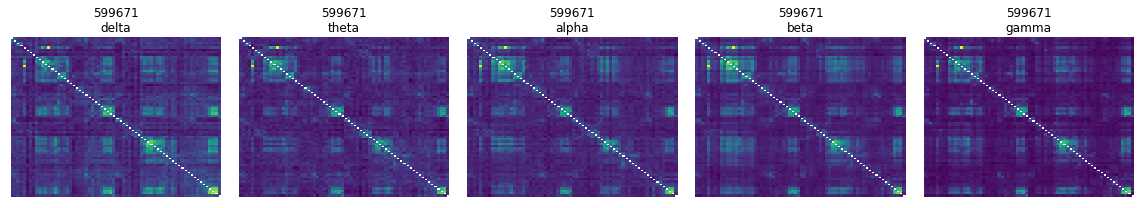

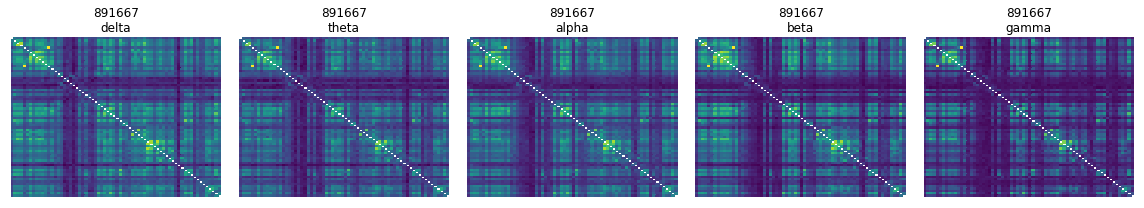

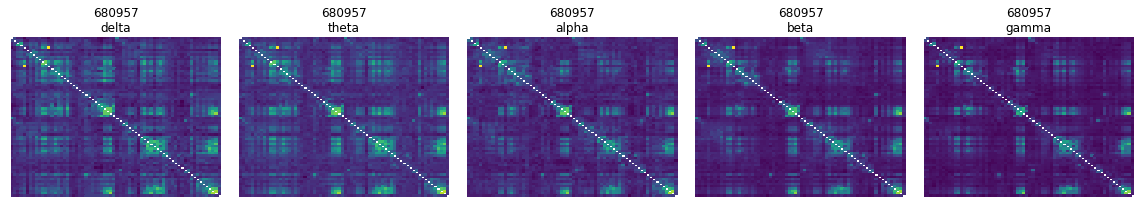

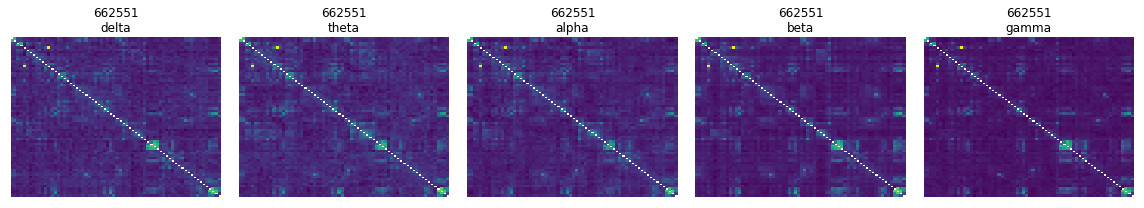

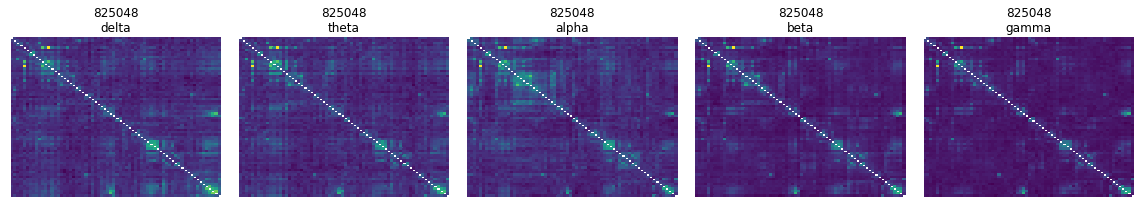

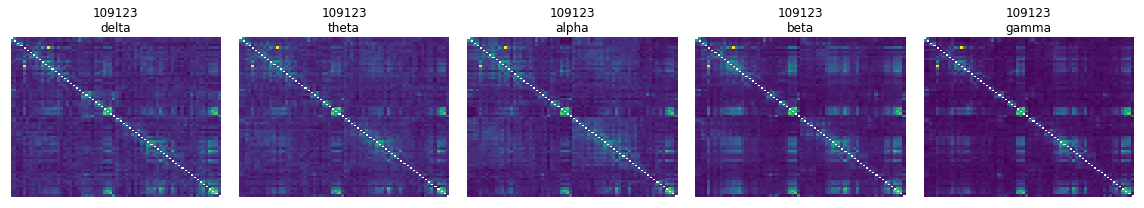

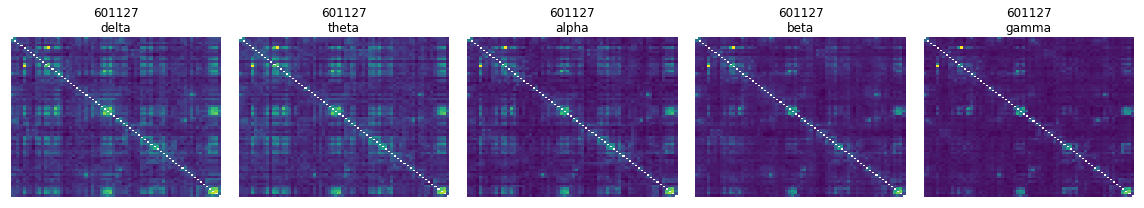

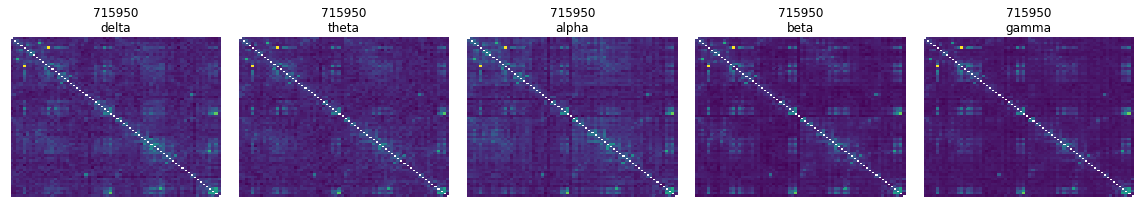

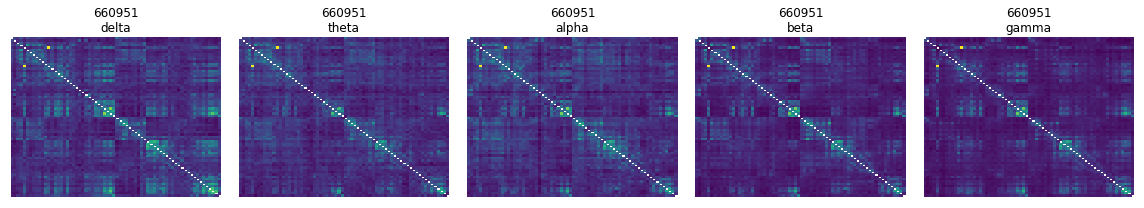

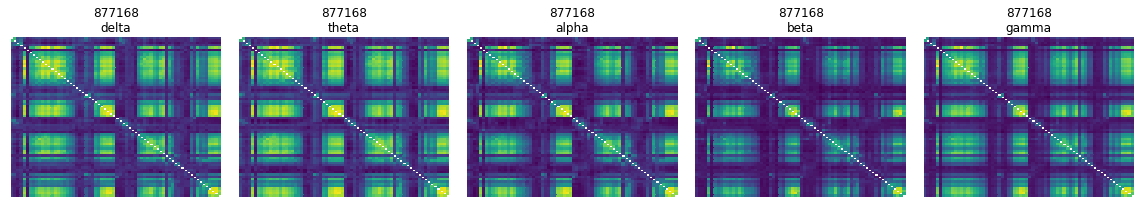

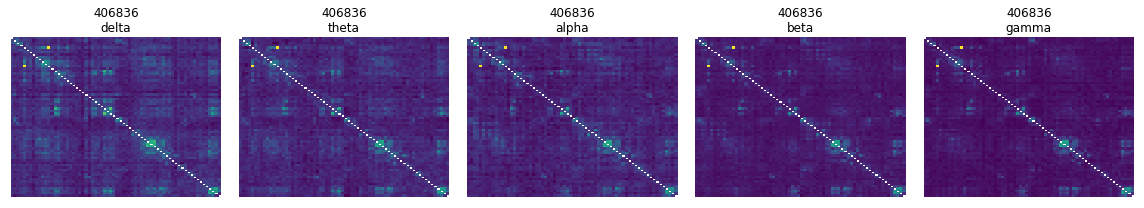

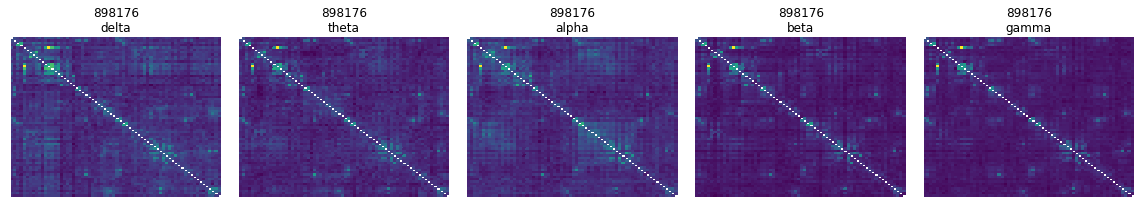

In [25]:
for subject in all_fc_aecs_avg.keys():
    
    
    fig, ax = plt.subplots(ncols=5, figsize=(16,3))

    for f_it,f in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
        a = ax[f_it]
        sns.heatmap(all_fc_aecs_avg[subject][f][nidx,:][:,nidx],
            cmap='viridis',mask=np.eye(68),ax=a,#vmax=0.4,
            xticklabels='',yticklabels='',cbar=False)
        a.set_title('%s\n%s' %(subject,f))
    
    plt.tight_layout()    
    

Group average

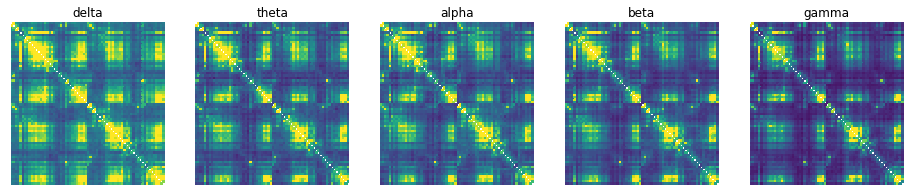

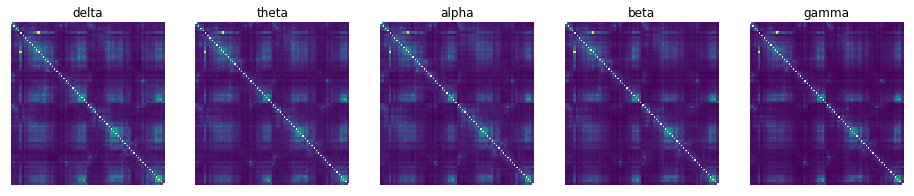

In [36]:
grp_avg_fc_aecs = {freq: np.zeros([68,68]) for freq in freq_bands.keys()}

for freq in freq_bands.keys():
    cnt = 0
    for sub,aecs in all_fc_aecs_avg.items():
        grp_avg_fc_aecs[freq] += aecs[freq]
        cnt+=1

    grp_avg_fc_aecs[freq] /= cnt

    
fig, ax = plt.subplots(ncols=5, figsize=(16,3))


# constrain color scaling vmax=0.3
for f_it,f in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
    a = ax[f_it]
    sns.heatmap(grp_avg_fc_aecs[f][nidx,:][:,nidx],
            cmap='viridis',mask=np.eye(68),ax=a,vmin=0.,vmax=0.3,
            xticklabels='',yticklabels='',cbar=False)
    a.set_title('%s' %f)

fig, ax = plt.subplots(ncols=5, figsize=(16,3))

# unconstrained color scaling
for f_it,f in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
    a = ax[f_it]
    sns.heatmap(grp_avg_fc_aecs[f][nidx,:][:,nidx],
            cmap='viridis',mask=np.eye(68),ax=a,#vmax=0.4,
            xticklabels='',yticklabels='',cbar=False)
    a.set_title('%s' %f)

Seem to lose a lot of the structure when averaging...